#Learning Linear Regression in Data Science and Machine Learning

Author: Fernando Filho

###Database

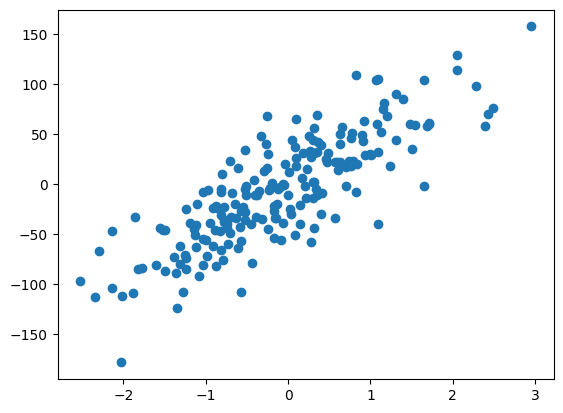

In [ ]:
#Scatter plot
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
#Data
x, y = make_regression(n_samples=200, n_features=1, noise=30)
plt.scatter(x, y)
plt.show()

###Linear regression

In [ ]:
#Time calculate
%%time
#Make Linear regression (y = coef_ * x + intercept_):
from sklearn.linear_model import LinearRegression
Modelo = LinearRegression(n_jobs = -1)
Modelo.fit(x, y)

CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 6.37 ms


LinearRegression(n_jobs=-1)

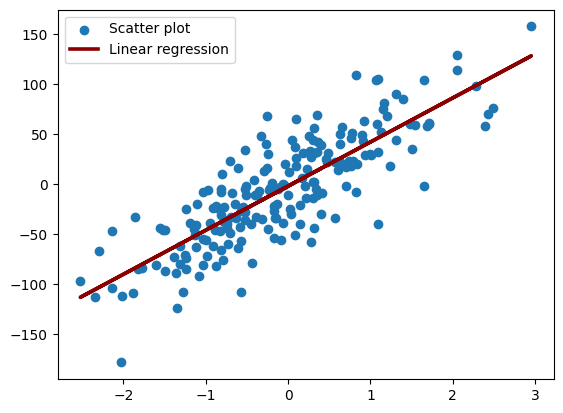

In [ ]:
#Plot Scatter e Linear regression
plt.scatter(x, y)
plt.plot(x, x*Modelo.coef_ + Modelo.intercept_, color = "darkred", linewidth = 2.6)
plt.legend(["Scatter plot","Linear regression"])
plt.show()

###Train test split

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#Data division train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
#Training
Modelo.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
#Prediction
y_pred = Modelo.predict(x_test)

$$
R^2 = \frac{\sum_{i=1}^n (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$


###Model evaluation

In [ ]:
#r2 score
"""
R^2 score is a statistical measure that calculates the efficiency of a RL model
"""
r2_score(y_test, y_pred)

0.7355303735997423

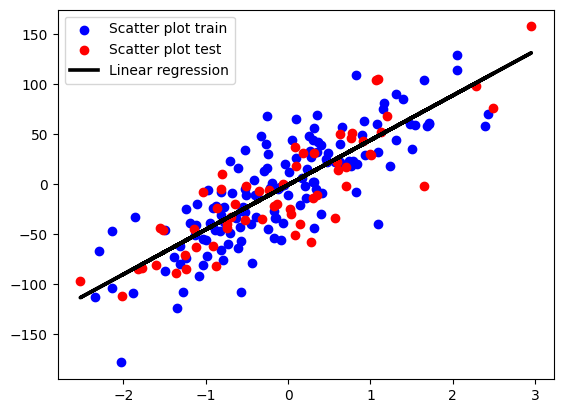

In [ ]:
plt.scatter(x_train, y_train, color = "blue")
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, x_test*Modelo.coef_ + Modelo.intercept_, color = "black", linewidth = 2.6)
plt.legend(["Scatter plot train", "Scatter plot test","Linear regression"])
plt.show()
#

#House Sales in King County, USA

##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

##Importing data

In [ ]:
Data = pd.read_csv("/content/kc_house_data.csv")
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Data Preprocessing

In [ ]:
Data.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    Data,                     # <- seu DataFrame
    lat="lat",                # <- nome da coluna de latitude
    lon="long",               # <- nome da coluna de longitude
    text="id",                # <- texto visível sobre o ponto
    size="price",             # <- tamanho proporcional ao preço
    color="id",               # <- cor baseada em identificador (categorias únicas)
    hover_name="id",          # <- aparece ao passar o mouse
    hover_data={
        "lat": True,
        "long": True,
        "price": True
    },
    zoom=12,
    height=500
)

# Estilo do mapa (OpenStreetMap é gratuito e não precisa de token)
fig.update_layout(mapbox_style="open-street-map")

# Remove margens externas do gráfico
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Mostra o gráfico
fig.show()


In [ ]:
#Drop id and date
Data.drop(["id", "date", "zipcode"], axis = 1, inplace = True)
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


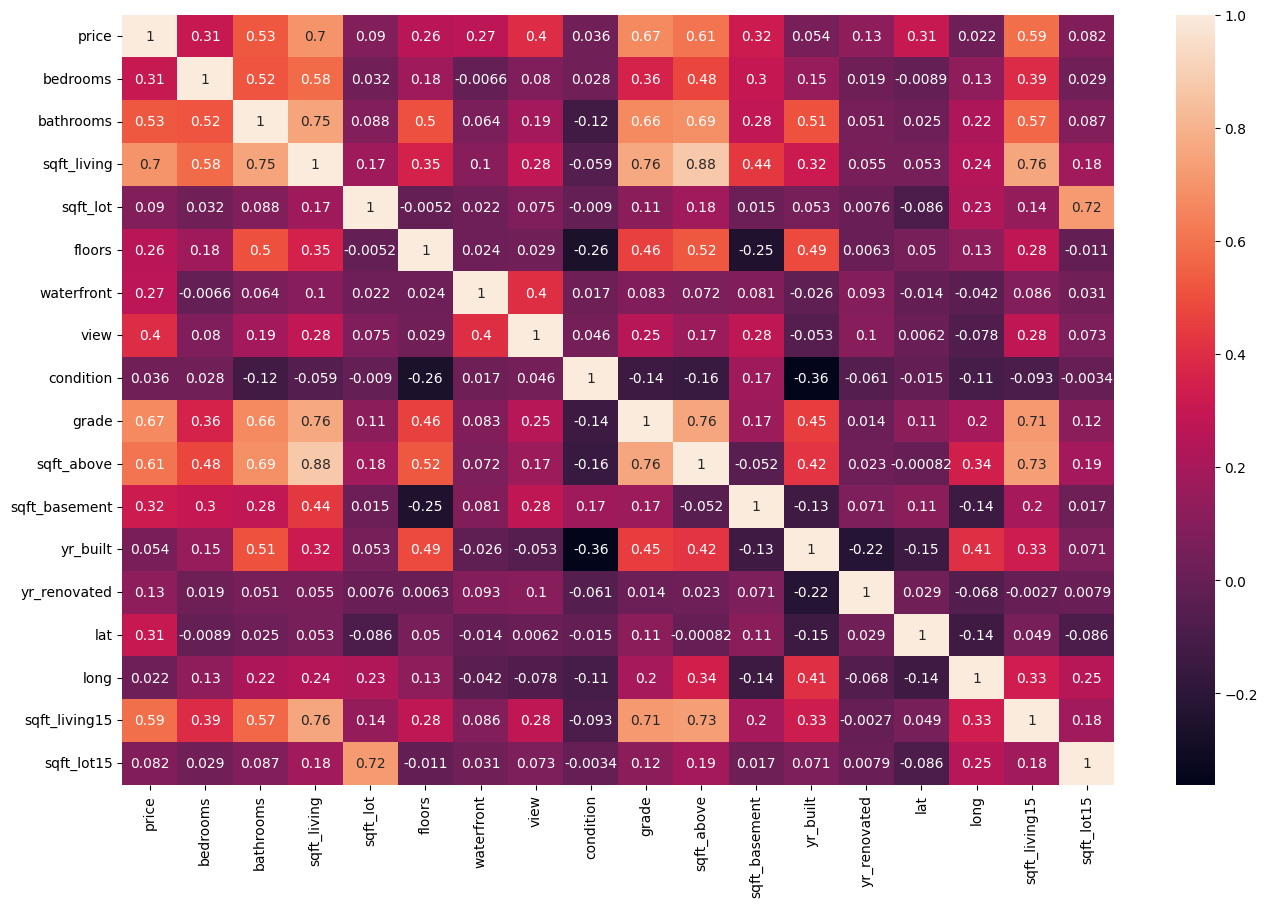

In [ ]:
#Pearson
import seaborn as sbn
plt.figure(figsize = (16, 10))
sbn.heatmap(Data.corr(), annot = True)
plt.show()

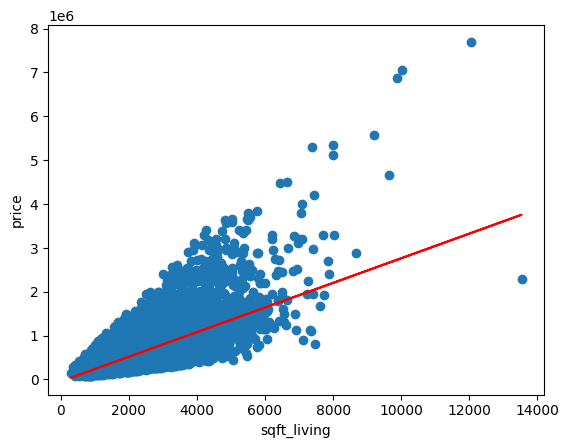

In [ ]:
#Price x sqft_living
Linear_regression_price_sqtf_living = LinearRegression()
Linear_regression_price_sqtf_living.fit(Data[["sqft_living"]], Data["price"])
plt.scatter(Data["sqft_living"], Data["price"])
plt.plot(Data["sqft_living"], Data["sqft_living"]*Linear_regression_price_sqtf_living.coef_ + Linear_regression_price_sqtf_living.intercept_, color = "red")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

In [ ]:
#Data split
y = Data["price"]
x = Data.drop(["price"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
Modelo = LinearRegression(n_jobs = -1)
Modelo.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_pred = Modelo.predict(x_test)
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.6945727324117975
